# *Ayudantia 1*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import scipy.stats as sp

## **Pregunta 3**

### Se realiza un estudio acerca de los efectos del tabaquismo sobre los patrones de sueño. La medición que se observa es el tiempo, en minutos, que toma quedar dormido. Se obtienen los siguientes datos:

In [2]:
fumadores=[69.3,56,22.1,47.6,53.2,48.1,52.7,34.4,60.2,43.8,23.2,13.8]
no_fumadores=[28.6,25.1,26.4,34.9,29.8,28.4,38.5,30.2,30.6,31.8,41.6,21.1,36.0,37.9,13.9]

### Calcule la media de la muestra para cada grupo.

In [3]:
print("\n",np.mean(fumadores),"\n",np.mean(no_fumadores))


 43.699999999999996 
 30.32


### Calcule la desviación estándar de la muestra para cada grupo.

In [4]:
print("\n",np.std(fumadores),"\n",np.std(no_fumadores))


 16.207097210790092 
 6.8861406704578245


### Elabore una gráfica de puntos de los conjuntos de datos A y B en la misma línea.

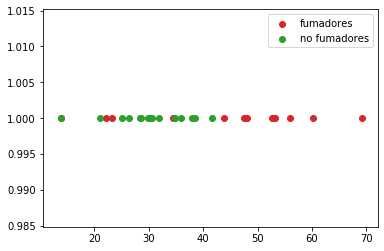

In [5]:
y_1=[1]*len(fumadores)
y_2=[1]*len(no_fumadores)
fig, ax = plt.subplots()
ax.scatter(fumadores, y_1, c='tab:red', label='fumadores',
               alpha=1)
ax.scatter(no_fumadores, y_2, c='tab:green',label='no fumadores',
               alpha=1)
ax.legend()
plt.show()

### Comente qué clase de efecto parece tener el hecho de fumar sobre el tiempo que se requiere para quedarse dormido.

## **Pregunta 4**

### Las siguientes puntuaciones representan la calificación en el examen final para un curso de estadística elemental:

In [6]:
notas=[23 , 60 , 79 , 32 , 57 , 74 , 52 ,70 , 82 , 36 ,80 , 77, 81 ,95 ,41 ,65 ,92, 85,55 ,76, 52, 10 ,64 ,75, 78 ,25, 80 , 98 ,81 ,67, 41, 71 ,83, 54 ,64, 72,  88, 62 ,74 ,43, 60, 78 ,89, 76, 84 , 48, 84 ,90, 15 ,79, 34 ,67, 17, 82 ,69 ,74, 63 ,80 ,85 ,61]

### Elabore un diagrama de tallo y hojas para las calificaciones del examen, donde los tallos sean 1, 2,3,..., 9.

In [7]:
diag={}
i=1
while i != 10:
    lista=[]
    for j in notas:
        if i*10<=j<=i*10+9:
            lista.append(j-10*i)
    diag[i]=lista
    i+=1
print(diag)

{1: [0, 5, 7], 2: [3, 5], 3: [2, 6, 4], 4: [1, 1, 3, 8], 5: [7, 2, 5, 2, 4], 6: [0, 5, 4, 7, 4, 2, 0, 7, 9, 3, 1], 7: [9, 4, 0, 7, 6, 5, 8, 1, 2, 4, 8, 6, 9, 4], 8: [2, 0, 1, 5, 0, 1, 3, 8, 9, 4, 4, 2, 0, 5], 9: [5, 2, 8, 0]}


In [8]:
df = pd.DataFrame([[key, diag[key]] for key in diag.keys()], columns=['tallo', 'hojas'])
df

,tallo,hojas
0,1,"[0, 5, 7]"
1,2,"[3, 5]"
2,3,"[2, 6, 4]"
3,4,"[1, 1, 3, 8]"
4,5,"[7, 2, 5, 2, 4]"
5,6,"[0, 5, 4, 7, 4, 2, 0, 7, 9, 3, 1]"
6,7,"[9, 4, 0, 7, 6, 5, 8, 1, 2, 4, 8, 6, 9, 4]"
7,8,"[2, 0, 1, 5, 0, 1, 3, 8, 9, 4, 4, 2, 0, 5]"
8,9,"[5, 2, 8, 0]"


### Elabore un histograma de frecuencias relativas, trace un estimado de la gráfica de la distribución y analice la asimetría de la distribución.

<function matplotlib.pyplot.show(*args, **kw)>

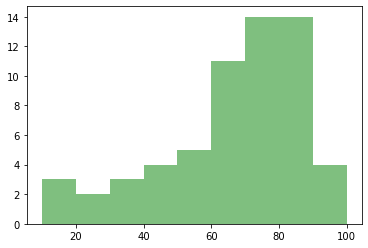

In [9]:
plt.hist(notas,bins=9,range=(10,100),color='green',alpha=0.5)
plt.show

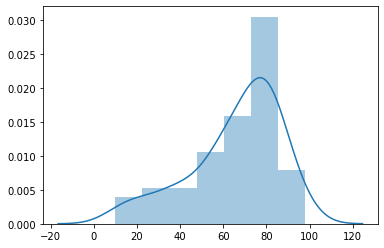

In [10]:
sns.distplot(notas)

### Agrupe los datos en un tabla y calcule las medidas de resumen para la muestra y para la tabla construida.

#### Para la muestra

In [11]:
print("\n",sp.describe(notas),"\n",sp.mode(notas),"\n",np.median(notas))

print(np.percentile(notas,25,interpolation='midpoint'))


 DescribeResult(nobs=60, minmax=(10, 98), mean=65.48333333333333, variance=446.6268361581921, skewness=-0.9290207912845316, kurtosis=0.1197570942470052) 
 ModeResult(mode=array([74]), count=array([3])) 
 71.5
54.5


### Construcción de la tabla para 9 clases

In [12]:
table={}

i=1
while i != 10:
    dic_aux={}
    f_j=0
    for j in notas:
        if i*10<=j<=i*10+9:
            f_j+=1
    if i==1:
        dic_aux['intervalo']='['+str(i*10)+'-'+str(i*10+10)+'['
        dic_aux['marca_de_clase']=i*10+5
        dic_aux['f_j']=f_j
        dic_aux['F_j']=f_j
        dic_aux['f_r']=f_j/len(notas)
        dic_aux['F_r']=f_j/len(notas)
        
    elif i<9:
        dic_aux['intervalo']='['+str(i*10)+'-'+str(i*10+10)+'['
        dic_aux['marca_de_clase']=i*10+5
        dic_aux['f_j']=f_j
        dic_aux['F_j']=f_j+table[i-1]['F_j']
        dic_aux['f_r']=f_j/len(notas)
        dic_aux['F_r']=f_j/len(notas)+table[i-1]['F_r']
    else:
        dic_aux['intervalo']='['+str(i*10)+'-'+str(i*10+10)+']'
        dic_aux['marca_de_clase']=i*10+5
        dic_aux['f_j']=f_j
        dic_aux['F_j']=f_j+table[i-1]['F_j']
        dic_aux['f_r']=f_j/len(notas)
        dic_aux['F_r']=f_j/len(notas)+table[i-1]['F_r']
    table[i]=dic_aux
    i+=1

In [13]:
df = pd.DataFrame([key for key in table.keys()], columns=['tallo'])
df['intervalo'] = [value['intervalo'] for value in table.values()]
df['marca_de_clase'] = [value['marca_de_clase'] for value in table.values()]
df['f_j'] = [value['f_j'] for value in table.values()]
df['F_j'] = [value['F_j'] for value in table.values()]
df['f_r'] = [value['f_r'] for value in table.values()]
df['F_r'] = [value['F_r'] for value in table.values()]
df.drop('tallo',axis=1)

,intervalo,marca_de_clase,f_j,F_j,f_r,F_r
0,[10-20[,15,3,3,0.050000,0.050000
1,[20-30[,25,2,5,0.033333,0.083333
2,[30-40[,35,3,8,0.050000,0.133333
3,[40-50[,45,4,12,0.066667,0.200000
4,[50-60[,55,5,17,0.083333,0.283333
5,[60-70[,65,11,28,0.183333,0.466667
6,[70-80[,75,14,42,0.233333,0.700000
7,[80-90[,85,14,56,0.233333,0.933333
8,[90-100],95,4,60,0.066667,1.000000


In [43]:
def promedio(marca_de_clase,frecuencia_absoluta):
    suma=0
    n=0
    for i in range(0,len(list(marca_de_clase))):
        suma+=list(marca_de_clase)[i]*list(frecuencia_absoluta)[i]
        n+=list(frecuencia_absoluta)[i]
    return suma/n

def var(marca_de_clase,frecuencia_absoluta):
    suma=0
    n=0
    for i in range(0,len(marca_de_clase)):
        suma+= marca_de_clase[i]*marca_de_clase[i]*frecuencia_absoluta[i]    
    return suma-promedio(marca_de_clase,frecuencia_absoluta)**2

def mo(marca_de_clase,frecuencia_absoluta):
    pos=frecuencia_absoluta.index(max(frecuencia_absoluta))+1
    return marca_de_clase[pos]+(frecuencia_absoluta[pos]-frecuencia_absoluta[pos-i])*10/(2*frecuencia_absoluta[pos]-frecuencia_absoluta[pos-1]+frecuencia_absoluta[pos+1])

def me(marca_de_clase,frecuencia_absoluta,frecuencia_absoluta_acumulada):
    for i in range(0,len(marca_de_clase)):
        if frecuencia_absoluta_acumulada[i]>= frecuencia_absoluta_acumulada[len(marca_de_clase)-1]/2:
            if frecuencia_absoluta_acumulada[i-1]< frecuencia_absoluta_acumulada[len(marca_de_clase)-1]/2:
                pos=i
        print()
    
    return marca_de_clase[pos]-5 +(frecuencia_absoluta_acumulada[len(marca_de_clase)-1]/2 - frecuencia_absoluta_acumulada[pos-1])/(frecuencia_absoluta[pos])


In [44]:
#promedio(df['marca_de_clase'],df['f_j'])
#mo(list(df['marca_de_clase']),list(df['f_j']))
#me(list(df['marca_de_clase']),list(df['f_j']),list(df['F_j']))
var(list(df['marca_de_clase']),list(df['f_j']))

286877.75

In [16]:
np.quantile(notas, (.25, .50, .75))

array([54.75, 71.5 , 80.25])